In [8]:
import scanpy as sc
import anndata as ad
import scipy.sparse as sp
import pandas as pd
import numpy as np

In [5]:
adata_10k = sc.read_h5ad('/home/icb/jonas.flor/gastrulation_atlas/scvi/training/1M/10k_genes/2/2048/integrated_adata.h5ad', backed='r')
adata_all = sc.read_h5ad('/home/icb/jonas.flor/gastrulation_atlas/scvi/training/1M/all_genes/2/2048/integrated_adata.h5ad', backed='r')

In [9]:
adata_10k

AnnData object with n_obs × n_vars = 1000000 × 10000 backed at '/home/icb/jonas.flor/gastrulation_atlas/scvi/training/1M/10k_genes/2/2048/integrated_adata.h5ad'
    obs: 'cell_id', 'keep', 'day', 'embryo_id', 'experimental_batch', 'batch', 'cell_cluster', 'celltype', 'cellcluster_moscot', '_scvi_batch', '_scvi_labels', 'dpt_pseudotime'
    uns: 'diffmap_evals', 'iroot', 'log1p', 'neighbors'
    obsm: 'X_diffmap', 'X_emb'
    obsp: 'connectivities', 'distances'

In [3]:
#Invitro

In [4]:
inv_10k = sc.read_h5ad('/home/icb/jonas.flor/gastrulation_atlas/scvi/reference_query/scarches/1M/10k_genes/2/2048/invito/invito_adata.h5ad', backed='r')

AnnData object with n_obs × n_vars = 26948 × 10000 backed at '/home/icb/jonas.flor/gastrulation_atlas/scvi/reference_query/scarches/1M/10k_genes/2/2048/invito/invito_adata.h5ad'
    obs: 'day', 'celltype', 'batch', 'dpt_pseudotime'
    uns: 'batch_colors', 'celltype_colors', 'day_colors', 'diffmap_evals', 'iroot', 'log1p', 'neighbors'
    obsm: 'X_diffmap', 'X_emb', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [11]:
inv_10k = sc.read_h5ad('/home/icb/jonas.flor/gastrulation_atlas/scvi/reference_query/scarches/1M/10k_genes/2/2048/invito/invito_adata.h5ad', backed='r')
adata = ad.AnnData(np.empty((adata_10k.n_obs+inv_10k.n_obs, 10000)))
adata.obs['celltype'] = pd.concat([adata_10k.obs.cellcluster_moscot, inv_10k.obs.celltype]).values
adata.obs['batch'] = pd.concat([adata_10k.obs.embryo_id, inv_10k.obs.batch]).values
adata.obs['day'] = pd.concat([adata_10k.obs.day, inv_10k.obs.day]).values
adata.obsm['X_emb'] = np.concatenate((adata_10k.obsm['X_emb'], inv_10k.obsm['X_emb']), axis=0)
sc.pp.neighbors(adata, use_rep='X_emb')
sc.tl.umap(adata)

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


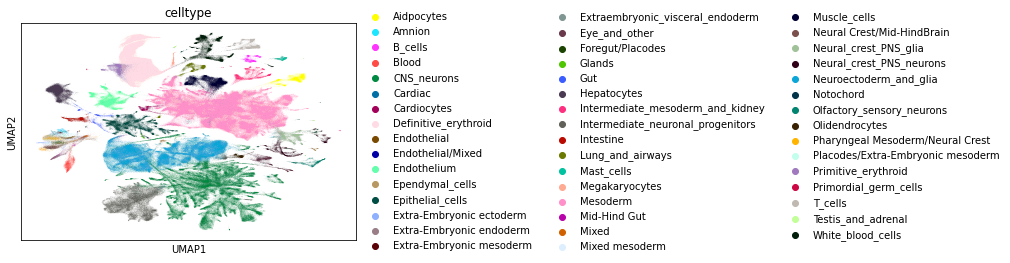

In [26]:
sc.pl.umap(adata, color='celltype', save='_invitro_10k_genes_celltypes_joint.png')

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


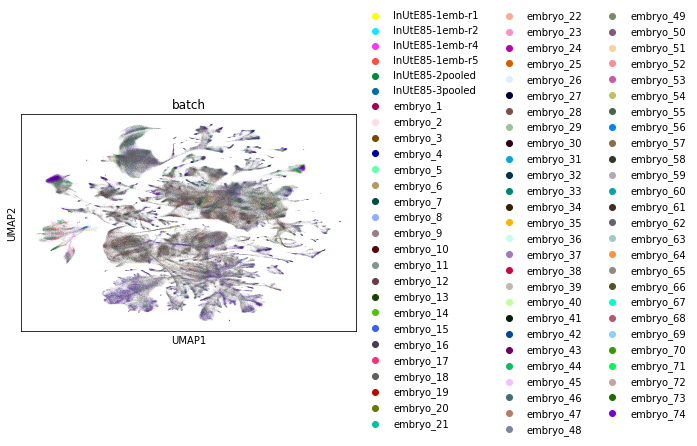

In [30]:
sc.pl.umap(adata, color='batch', save='_invitro_10k_genes_batch_joint.png')

In [ ]:
sc.pl.umap(adata, color='day', save='_invitro_10k_genes_day_joint.png')

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


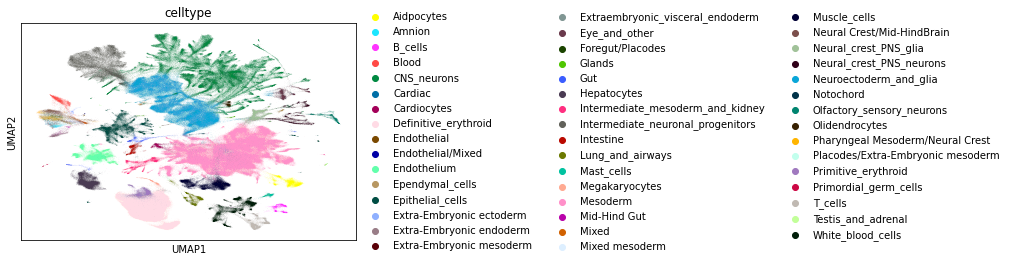

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


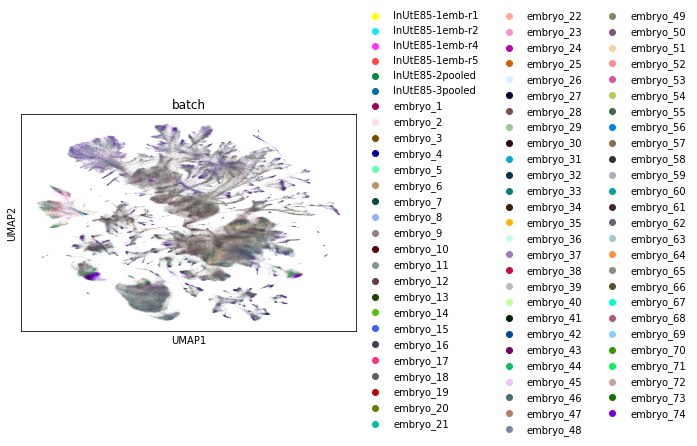

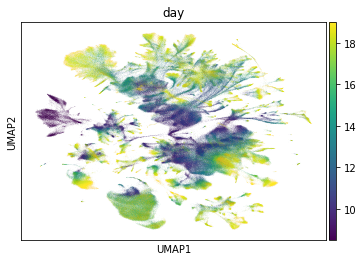

In [34]:
inv_all = sc.read_h5ad('/home/icb/jonas.flor/gastrulation_atlas/scvi/reference_query/scarches/1M/all_genes/2/2048/invito/invito_adata.h5ad', backed='r')
adata = ad.AnnData(np.empty((adata_all.n_obs+inv_all.n_obs, adata_all.n_vars)))
adata.obs['celltype'] = pd.concat([adata_all.obs.cellcluster_moscot, inv_all.obs.celltype]).values
adata.obs['batch'] = pd.concat([adata_all.obs.embryo_id, inv_all.obs.batch]).values
adata.obs['day'] = pd.concat([adata_all.obs.day, inv_all.obs.day]).values
adata.obsm['X_emb'] = np.concatenate((adata_all.obsm['X_emb'], inv_all.obsm['X_emb']), axis=0)
sc.pp.neighbors(adata, use_rep='X_emb')
sc.tl.umap(adata)

sc.pl.umap(adata, color='celltype', save='_invitro_all_genes_celltypes_joint.png')

sc.pl.umap(adata, color='batch', save='_invitro_all_genes_batch_joint.png')

sc.pl.umap(adata, color='day', save='_invitro_all_genes_day_joint.png')

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


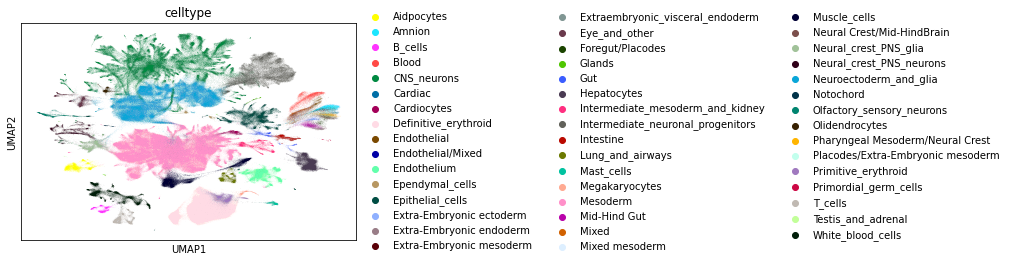

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


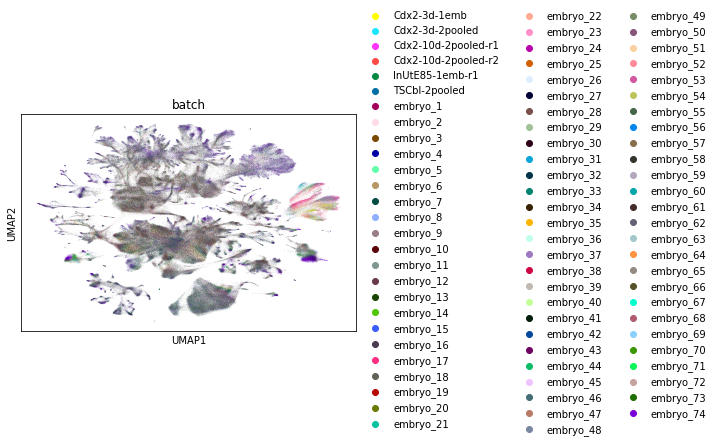

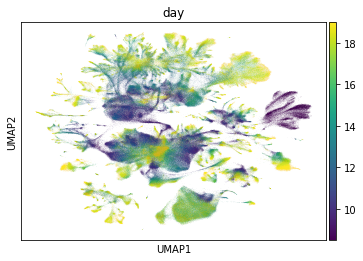

In [33]:
exv_all = sc.read_h5ad('/home/icb/jonas.flor/gastrulation_atlas/scvi/reference_query/scarches/1M/all_genes/2/2048/exvito/exvito_adata.h5ad', backed='r')
adata = ad.AnnData(np.empty((adata_all.n_obs+exv_all.n_obs, adata_all.n_vars)))
adata.obs['celltype'] = pd.concat([adata_all.obs.cellcluster_moscot, exv_all.obs.celltype]).values
adata.obs['batch'] = pd.concat([adata_all.obs.embryo_id, exv_all.obs.batch]).values
adata.obs['day'] = pd.concat([adata_all.obs.day, exv_all.obs.day]).values
adata.obsm['X_emb'] = np.concatenate((adata_all.obsm['X_emb'], exv_all.obsm['X_emb']), axis=0)
sc.pp.neighbors(adata, use_rep='X_emb')
sc.tl.umap(adata)

sc.pl.umap(adata, color='celltype', save='_exvitro_all_genes_celltypes_joint.png')

sc.pl.umap(adata, color='batch', save='_exvitro_all_genes_batch_joint.png')

sc.pl.umap(adata, color='day', save='_exvitro_all_genes_day_joint.png')

In [ ]:
exv_10k = sc.read_h5ad('/home/icb/jonas.flor/gastrulation_atlas/scvi/reference_query/scarches/1M/all_genes/2/2048/exvito/exvito_adata.h5ad', backed='r')
adata = ad.AnnData(np.empty((adata_10k.n_obs+exv_10k.n_obs, adata_10k.n_vars)))
adata.obs['celltype'] = pd.concat([adata_10k.obs.cellcluster_moscot, exv_10k.obs.celltype]).values
adata.obs['batch'] = pd.concat([adata_10k.obs.embryo_id, exv_10k.obs.batch]).values
adata.obs['day'] = pd.concat([adata_10k.obs.day, exv_10k.obs.day]).values
adata.obsm['X_emb'] = np.concatenate((adata_10k.obsm['X_emb'], exv_10k.obsm['X_emb']), axis=0)
sc.pp.neighbors(adata, use_rep='X_emb')
sc.tl.umap(adata)

sc.pl.umap(adata, color='celltype', save='_exvitro_10k_genes_celltypes_joint.png')

sc.pl.umap(adata, color='batch', save='_exvitro_10k_genes_batch_joint.png')

sc.pl.umap(adata, color='day', save='_exvitro_10k_genes_day_joint.png')